# **Modelo de diagnosticación de diabetes**

- **Daniel Hernando Ospina Martin**

## **1. Entendimiento del negocio y carga de datos**
 * Objetivos del negocio
 * Metas del proyecto de machine learning
 * Planeación
 * Recolección de datos
 * Código de carga u obtención de datos

### **Objetivo del negocio**

El proyecto se encuentra en el dominio de la medicina. Los beneficiarios son personas o entidades interesadas en diagnosticar y brindar tratamientos adecuados y oportunos para la diabetes, enfocado en mujeres mayores a 21 años.

La diabetes es una enfermedad crónica que afecta la producción de insulina (hormona que ayuda a regular el nivel de azúcar en la sangre). La detección oportuna de la diabetes permite reducir impactos severos a largo plazo en la calidad de vida de las personas.

### **Metas del proyecto de Machine Learning**
Con este proyecto se propone realizar un modelo de clasificación para determinar si una paciente tiene diabetes a partir examenes realizados previamente, agilizando el inicio de tratamientos y cuidados.

Las limitantes del proyecto radican en que la cantidad de datos es muy reducida y existe un ligero desbalanceo en la variable **target** (**34,9%** corresponde a registros de pacientes diagnosticadas como diabeticas mientras que un **65,1%** son no diabeticas).

Diferentes entidades de salud podrían tener la capacidad de monitorear características y diagnosticos en un(a) paciente para anticipar la posibilidad de que este(a) padezca diabetes, facilitando así los tratamientos y evitando complicaciones de salud a causa de esta enfermedad.

### **Recolección de datos**
Los datos fueron recolectados por el '*National Institute of Diabetes and Digestive and Kidney Diseases*' y fueron puestos a disposición del público a través de la página de Kaggel en formato csv (https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database?select=diabetes.csv). Los datos que contiene el dataset son categóricos y numéricos, tales como:

* `Glucose` (concentración de glucosa)
* `Pregnancies` (número de embarazos)
* `BloodPressure` (presión arterial)
* `SkinThickness` (grosor del pliegue cutáneo del tríceps)

Los cuales corresponden a mujeres mayores de 21 años que se han realizado exámenes previos para el estudio y diagnóstico de la enfermedad.

### **Planeación**
1. Minería de datos y entendimiento del negocio (27/marzo - 3/abril).

2. Preprocesamiento de datos y análisis exploratorio de datos (3/abril - 17/abril).

4. Escogiendo un modelo de ML, técnicas de agrupamiento y busqueda de mejores hiperparametros y paramétros(17/abril - 24/abril).

5. Evaluación de métricas del modelo y tunning (24/abril - 2/mayo).

### **Código de carga u obtención de datos**

In [ ]:
import pandas as pd

df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## **2. Entendimiento de los datos**
 * Análisis explaratorio de datos
 * Análisis descriptivo y visualización de datos

### **Análisis exploratorio de datos**

El formato en el que están almacenados los datos es un archivo csv tiene un peso de 24 KB. (https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database?select=diabetes.csv).

Al cargar el archivo en el notebook ocupa un espacio en memoria de 54.1 KB. La base cuenta con 769 registros y 9 columnas que corresponden:

* `Outcome` (Resultado)
* `Glucose` (concentración de glucosa)
* `Pregnancies` (número de embarazos)
* `BloodPressure` (presión anterial)
* `SkinThickness` (grosor del pliegue cutáneo del tríceps)
* `Insulin` (Insulina sérica de 2 horas (mu U/ml))
* `BMI` (Índice de masa corporal (peso en kg/(altura en m)^2))
* `DiabetesPedigreeFunction` (Función del pedigrí de la diabetes)
* `Age` (Edad (años))

Todos los datos se ven con un formato adecuado `int64` y `float64`.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


No se encuentran valores faltantes

In [ ]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

No se encuentran valores duplicados

In [ ]:
df.duplicated().sum()

0

### **Análisis descriptivo y visualización de los datos**

Viendo el `describe` del data set, no se ven datos corruptos como lo serían valores negativos o con simbolos desconocidos. No obstante, se observan valores atípicos como mediciones de `Glucose`, `Insulin`, `BMI`, `SkinThickness` y `BloodPressure` cuyo valor se muestra como `0`, los cuales generar ruido en el dataset y pueden considerarse como valores faltantes.

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [ ]:
import numpy as np
df2 = df[['Outcome','Pregnancies','DiabetesPedigreeFunction','Age']].copy()
df3 = df[['Glucose', 'Insulin', 'BMI', 'SkinThickness','BloodPressure']].copy()
df3.replace(to_replace=0,value=np.nan,inplace=True)
df3.isna().sum()

Glucose            5
Insulin          374
BMI               11
SkinThickness    227
BloodPressure     35
dtype: int64

In [ ]:
df4 = pd.concat([df3,df2],axis=1)
df4[df4.isnull().any(axis=1)]

,Glucose,Insulin,BMI,SkinThickness,BloodPressure,Outcome,Pregnancies,DiabetesPedigreeFunction,Age
0,148.0,NaN,33.6,35.0,72.0,1,6,0.627,50
1,85.0,NaN,26.6,29.0,66.0,0,1,0.351,31
2,183.0,NaN,23.3,NaN,64.0,1,8,0.672,32
5,116.0,NaN,25.6,NaN,74.0,0,5,0.201,30
7,115.0,NaN,35.3,NaN,NaN,0,10,0.134,29
...,...,...,...,...,...,...,...,...,...
761,170.0,NaN,44.0,31.0,74.0,1,9,0.403,43
762,89.0,NaN,22.5,NaN,62.0,0,9,0.142,33
764,122.0,NaN,36.8,27.0,70.0,0,2,0.340,27
766,126.0,NaN,30.1,NaN,60.0,1,1,0.349,47


Se busca generar un modelo de clasificación que diagnostique si una paciente tiene o no diabetes. Este diagnóstico corresponde a la variable objetivo `Outcome`, la cual es categórica y toma el valor `1` si la paciente es diabética y `0` en caso contrario.


In [ ]:
import plotly.express as px
balanceo = pd.pivot_table(df,index='Outcome',values=['BloodPressure'],aggfunc = 'count',sort=False).reset_index().rename(columns={'BloodPressure':'Count'})
balanceo['Outcome'] = balanceo['Outcome'].apply(lambda x: str(x))
px.bar(balanceo,x='Outcome',y='Count',color='Outcome',title='Distribución de la variable Outcome (variable target)',width=700,height=450,text_auto=True)

Analizando el gráfico de barras para la distribución de las etiquetas de la variable de interés se puede afirmar que existe un leve desbalanceo entre las etiquetas de la variable `Outcome`.

No se observa desbalanceo de la variable de `Pregnancies`

In [ ]:
balanceo2 = pd.pivot_table(df,index='Pregnancies',values=['BloodPressure'],aggfunc = 'count',sort=False).reset_index().rename(columns={'BloodPressure':'Count'})
balanceo2.sort_values('Pregnancies',ascending=False,inplace=True)
balanceo2['Pregnancies'] = balanceo2['Pregnancies'].apply(lambda x: str(x))
px.bar(balanceo2,x='Pregnancies',y='Count',color='Pregnancies',title='Distribución de la variable Pregnancies',width=700,height=450,text_auto=True)

In [ ]:
df5 = df4[['Glucose', 'Insulin', 'BMI', 'BloodPressure', 'DiabetesPedigreeFunction', 'Age']]
df_long = df5.melt(var_name='Variable', value_name='Valor')
fig = px.box(df_long, x='Variable', y='Valor', color='Variable',
             title='Boxplot de variables con colores diferentes para cada variable',
             width=800, height=600)
fig.update_xaxes(title=None)
fig.show()

A continuación, en el gráfico de correlación se observa, que las variables con una correlación positiva fuerte son: la edad con el número de embarazos, la glucosa con la varible outcome, la insulina con la varible outcome. Es decir, que a medida que se aumenta un valor de estas variables, aumenta la otra variable.

Como la variable de interes `Outcome` es dicotomica, se determina con el coeficiente de Spearman y el gráfico dispersión que las variables con correlación positiva son: `Pregnancies`, `Glucose`, `Insulin`, `BMI` y `Age`.   

Text(0.5, 1.0, 'Método spearman')

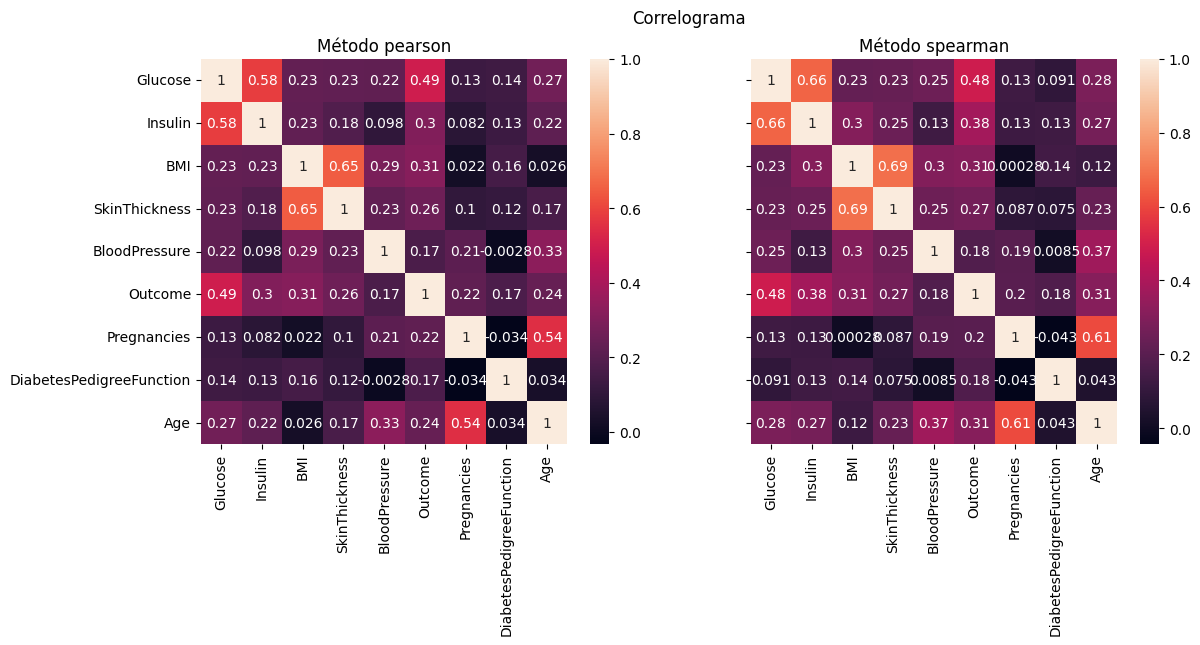

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


fig, ax = plt.subplots(1,2,figsize=(13,5),sharey=True)
fig.suptitle('Correlograma')

sns.heatmap(ax=ax[0],data = df4.corr(method='pearson'), annot = True)
ax[0].set_title('Método pearson')

sns.heatmap(ax=ax[1],data = df4.corr(method='spearman'), annot = True)
ax[1].set_title('Método spearman')

## **3. Preparación de datos**
 * Preprocesamiento y transformación de datos
 * Limpieza del conjunto de datos
 * Partición del conjunto de datos

### **Preprocesamiento y transformación de datos**

Con la función `describe`  se observa que no se encuentran datos corruptos (valores negativos o con símbolos desconocidos). Sin embargo, se observan valores atípicos en las mediciones de: `Glucose`, `Insulin`, `BMI`, `SkinThickness` y `BloodPressure` cuyo valor se muestra como `0`, estos valores generan ruido en el dataset y se consideran como valores faltantes.

A continuación, se calcula la propoción de estos datos faltantes (nulos) en el dataset.

In [ ]:
df2 = df[['Outcome','Pregnancies']].copy()
df3 = df[['Glucose', 'Insulin', 'BMI', 'SkinThickness','BloodPressure','DiabetesPedigreeFunction','Age']].copy()
df3.replace(to_replace=0,value=np.nan,inplace=True)
df4 = pd.merge(df2,df3,how='left',right_index=True,left_index=True).sort_index()

for i in ['Glucose','Insulin','BMI','SkinThickness', 'BloodPressure']:
  p= df4[i].loc[df4[i].isna()].shape[0]*100/df4.shape[0]
  print('La cantidad de valores nulos para ',i,'representa un ',round(p,2),'% de los registros')

La cantidad de valores nulos para  Glucose representa un  0.65 % de los registros
La cantidad de valores nulos para  Insulin representa un  48.7 % de los registros
La cantidad de valores nulos para  BMI representa un  1.43 % de los registros
La cantidad de valores nulos para  SkinThickness representa un  29.56 % de los registros
La cantidad de valores nulos para  BloodPressure representa un  4.56 % de los registros


La cantidad de valores nulos son casi la mitad del dataset, razón por la cual, estos valores pueden sesgar las medidas de tendencia central de algunas variables y su distribución.

Como se observa a continuación, ignorando estos valores núlos, las medidas de tendencia central de la variable `Insulin` y `SkinThickness` cambian considerablemente.

In [ ]:
df4.describe().T.sort_index(ascending=True)

,count,mean,std,min,25%,50%,75%,max
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
BMI,757.0,32.457464,6.924988,18.200,27.50000,32.3000,36.60000,67.10
BloodPressure,733.0,72.405184,12.382158,24.000,64.00000,72.0000,80.00000,122.00
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Glucose,763.0,121.686763,30.535641,44.000,99.00000,117.0000,141.00000,199.00
Insulin,394.0,155.548223,118.775855,14.000,76.25000,125.0000,190.00000,846.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
SkinThickness,541.0,29.153420,10.476982,7.000,22.00000,29.0000,36.00000,99.00


Además, observamos gráficamente la diferencia en la distribución de las variables `Insulin` y `SkinThickness` cuando se consideran valores núlos y cuando estos se omiten.

In [ ]:
box_plot_nulos = pd.DataFrame({'valor':[],'data':[]})
for i in ['Insulin','SkinThickness']:
  dfi = df[[i]].copy()
  dfi['data'] = i+'_with_null'
  dfi.rename(columns={i:'valor'},inplace=True)
  box_plot_nulos = pd.concat([box_plot_nulos,dfi],ignore_index=True,axis=0)
  dfi = df4[[i]].copy()
  dfi['data'] = i+'_without_null'
  dfi.rename(columns={i:'valor'},inplace=True)
  box_plot_nulos = pd.concat([box_plot_nulos,dfi],ignore_index=True,axis=0)

px.box(box_plot_nulos,
       x='data',
       y='valor',
       title='Box plot de Insulin y SkinThickness considerando valores nulos vs omitiendolos',
       color='data',
       width=900,
       height=600)

Teniendo en cuenta que estamos trabajando un ejercicio acádemico, se decide imputar los valores faltantes de la variable `Insulin` teniendo presente a las variables categóricas `Pregnancies` y `Outcome`.

In [ ]:
df4['Outcome'] = df4['Outcome'].apply(lambda x: str(x))
px.scatter(df4,
           x='Pregnancies',
           y='Insulin',
           title= 'Scatter y box plot Pregnancies vs Insulin',
           width=800,
           height=500,
           marginal_y='box',
           color='Outcome').show()

In [ ]:
#Reajustamos la variable Outcome a tipo 'int' para no tener conflicto mas adelante
df4['Outcome']=df4['Outcome'].astype(int)

El proceso de imputación realizado consiste en rellenar los valores faltantes en la columna `Insulin` utilizando la mediana de los valores de `Insulin` agrupados por los valores de las columnas `Pregnancies` y `Outcome`. Por ejemplo, si un registro tiene un valor faltante en `Insulin`, y tiene un valor de 2 en `Pregnancies` y un valor de 1 en `Outcome`, entonces se imputará el valor faltante en `Insulin` con la mediana de todos los registros que tienen un valor de 2 en `Pregnancies` y un valor de 1 en `Outcome`. Este proceso se repite para cada registro con valor faltante en `Insulin` en el conjunto de datos.

In [ ]:
print('Cantidad de registros antes de imputar: ',df4.shape[0])

Cantidad de registros antes de imputar:  768


In [ ]:
#Imputación de la variable Insulin
medianas=(((df4[['Pregnancies','Outcome','Insulin']].groupby(['Pregnancies','Outcome'])).median()).reset_index()).rename(columns={'Insulin':'Insulin_median'})
df4= df4.merge(medianas, on= ['Pregnancies','Outcome'], how='left')
df4['Insulin'] = df4.apply(lambda df4: df4['Insulin_median'] if np.isnan(df4['Insulin']) else df4['Insulin'],axis=1)
df4.drop('Insulin_median',axis=1,inplace=True)

Hubo algunos registros que no se pudieron imputar debido a la falta de valores en la columna `Insulin` cuando se agrupan por los valores de `Pregnancies` y `Outcome`. Por ejemplo, en el caso específico donde `Pregnancies` es igual a 11 y `Outcome` es igual a 0, no había datos disponibles para imputar el valor de `Insulin`.

In [ ]:
df4[df4['Insulin'].isna()]

,Outcome,Pregnancies,Glucose,Insulin,BMI,SkinThickness,BloodPressure,DiabetesPedigreeFunction,Age
36,0,11,138.0,NaN,33.2,NaN,76.0,0.420,35
558,0,11,103.0,NaN,46.2,40.0,68.0,0.126,42
559,0,11,85.0,NaN,30.1,NaN,74.0,0.300,35
658,0,11,127.0,NaN,39.0,NaN,106.0,0.190,51


Se decide eliminar estos 4 registros.

In [ ]:
#Depués de la imputación de los valores nulos de la variable insulina aún hay valores faltantes en insulina, se procede a elimianrlos (son solo 4)
df4.dropna(subset='Insulin',axis=0,inplace=True,ignore_index=True)
print('Cantidad de registros después de imputar y eliminar los que no pudieron ser imputados: ',df4.shape[0])

Cantidad de registros después de imputar y eliminar los que no pudieron ser imputados:  764


Adicionalmente, se encontró que la variable `SkinThickness` contiene un número significativo de valores atípicos (datos nulos) y una correlación sólida entre `SkinThickness` y la variable `BMI` que no tiene tantos valores faltantes, se optó por eliminar `SkinThickness` del conjunto de datos.






In [ ]:
df4.drop('SkinThickness',axis=1,inplace=True)

Para los valores faltantes de las variable `BloodPressure` (4.56 %), `BMI` (1.43 %) y `Glucose` (0.65 %), dado que son muy pocos valores faltantes, se decide imputarlos con su respectiva mediana.

In [ ]:
# Se hace imputación de valores faltantes en las demás variables
values = {'BloodPressure':df4['BloodPressure'].median(),
          'Glucose':df4['Glucose'].median(),
          'BMI':df4['BMI'].median()}
df4[['BloodPressure','Glucose','BMI']] = df4[['BloodPressure','Glucose','BMI']].fillna(value=values)

Se verifica que no existan datos fatantes (ni nulos, teniendo en cuenta el contexto del proyecto)

In [ ]:
df4.isna().sum()

Outcome                     0
Pregnancies                 0
Glucose                     0
Insulin                     0
BMI                         0
BloodPressure               0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

### **Limpieza del conjunto de datos**

Después del proceso de imputación realizado para los datos faltantes, se valida la distribución de los datos con un boxplot y se observa la presencia de valores atipicos en la variable `Insulin`.

In [ ]:
df_g = df4[['Glucose', 'Insulin', 'BMI', 'BloodPressure', 'DiabetesPedigreeFunction', 'Age']] #Se muestran los datos atípicos en Insulin
df_long = df_g.melt(var_name='Variable', value_name='Valor')
fig = px.box(df_long, x='Variable', y='Valor', color='Variable',
             title='Boxplot de variables con colores diferentes para cada variable',
             width=800, height=600)
fig.update_xaxes(title=None)
fig.show()

Se consultaron diferentes fuentes de información (fuente bibliográfica al final) para poder determinar qué valores de la variable Insulin estan completamenete fuera de un rango real en la práctica y se decidió eliminar los registros en los que Insulin supera el valor de 400 (mu U /M).

In [ ]:
#Se eliminan valores outliers o valores corruptos del dataset
df4.drop(df4[df4['Insulin'] > 400].index,inplace=True)

In [ ]:
df_g = df_g.drop(df_g[df_g['Insulin'] > 400].index)
df_long = df_g.melt(var_name='Variable', value_name='Valor') #Se muestra boxplot omitiendo los datos atípicos en Insulin
fig = px.box(df_long, x='Variable', y='Valor', color='Variable',
             title='Boxplot de variables con colores diferentes para cada variable',
             width=800, height=600)
fig.update_xaxes(title=None)
fig.show()

Después de graficar el boxplot y filtrar los valores de `Insulin` superiores a 400 (mu U /M), se evidencia una reducción en la cantidad de valores atípicos. Estos datos ahora son tomados en cuenta para el análisis, y no se detectan inconsistencias en el conjunto de datos. La variable de mayor interés para la estimación es `Outcome`, que indica si la persona tiene diabetes o no. Dado esto, no se percibe la necesidad de estandarizar las variables a una única medida para la variable de interés.


### **Partición del conjunto de datos**

El conjunto de datos se dividirá en 2 partes de la siguiente manera:

1. Se reserva el 10% de los datos originales para evaluación.

2. Los modelos seleccionados se validarán utilizando el 90% restante.
  Este 90% se divide a su vez en un 30% para el test y el resto para la creación del modelo.


En `df5_test` y `df5_outcome_test` se guarda el 10% del data set para evaluar el modelo (Sección 5).

In [ ]:
from sklearn.model_selection import train_test_split


df5, df5_test, df5_outcome, df5_outcome_test = train_test_split(df4.drop('Outcome',axis=1), df4[['Outcome']], test_size=0.1, random_state=42,stratify=df4[['Outcome']])

## **4. Modelamiento y validación**
 * Selección de un modelo apropiado para el problema
 * Construcción y entrenamiento de los modelos
 * Deficición de criterios o métricas de evaluación

### **Selección de un modelo apropiado para el problema**

Se desea predecir la variable categórica `Outcome` con lo cual, es necesario elegir un modelo de clasificación.

Se decide comparar los resultados de los siguientes modelos `AdaBoostClassifier` (modelo de ensamble de tipo boosting), `RandomForestClassifier` (modelo de ensamble de tipo bagging), `LogisticRegression` y `SVC` (supervector clasifier).

### **Construcción y entrenamiento de los modelos**

Se importan todas las librerías necesarias para inicializar los modelos, también se aplica `StandardScaler` (para que no se tome más importancia a variables por su escala) y un `GridSearchCV` para que de cada modelo se encuentren los mejores parámetros.

In [ ]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
df5_std = pd.DataFrame(data=std.fit_transform(df5),columns=std.get_feature_names_out())

params_ADABOOST ={'n_estimators':[5,10,50,60],
        'learning_rate':[0.01,0.1,0.3],
         'algorithm':['SAMME', 'SAMME.R']}

params_RANDOMFOREST = {'n_estimators':[20,100,150],
                   'criterion':['gini','entropy'],
                   'max_depth':[5,20,None],
                   'max_leaf_nodes':[2,3,None]}

params_LOGISTIC = {'penalty':['l2'], #no permitió testear penalty l1 y elasticnet
                   'C':[0.5,1,2]}

params_SVC = {'kernel':['linear','poly','sigmoid'],
           'max_iter':[-1,4,10,20]}

X_train, X_test, y_train, y_test = train_test_split(df5_std, df5_outcome, test_size=0.30, random_state=42,stratify=df5_outcome)


ADABOOST =  AdaBoostClassifier()

RANDOMFOREST = RandomForestClassifier()

LOGISTIC = LogisticRegression()

SVC = SVC()

params =[params_ADABOOST,params_RANDOMFOREST,params_LOGISTIC,params_SVC]
models =[ADABOOST,RANDOMFOREST,LOGISTIC,SVC]

best_models = []
for i in range(len(params)):
  RGS = GridSearchCV(models[i],params[i])
  RGS.fit(X_train,y_train.values.ravel())
  best_models.append(RGS.best_estimator_)

best_models

[AdaBoostClassifier(learning_rate=0.3),
 RandomForestClassifier(max_depth=20, n_estimators=150),
 LogisticRegression(C=2),
 SVC(kernel='linear')]

### **Deficición de criterios o métricas de evaluación**

Con la búsqueda de parámetros del punto anterior ahora se puede comparar los 4 modelos con sus mejores parametros bajo distintas métricas como `Accuracy`, `Precision`, `Recall`, `F1_score`,
`mean_squared_error` y ver su matriz de confusión.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,  mean_squared_error
metrics = {
    'Accuracy': accuracy_score,
    'Precision': precision_score,
    'Recall': recall_score,
    'F1-score': f1_score
}
results = {}
for model in best_models:
    model_name = type(model).__name__
    y_pred = model.predict(X_test)
    results[model_name] = {metric_name: metric_fn(y_test, y_pred) for metric_name, metric_fn in metrics.items()}
    results[model_name]['Error cuadrático medio'] = mean_squared_error(y_test, y_pred)
    results[model_name]['Confusion Matrix'] = confusion_matrix(y_test, y_pred)


for model_name, metrics in results.items():
    print(f"Modelo: {model_name}")
    for metric_name, value in metrics.items():
        print(f"\t{metric_name}: {value}")

Modelo: AdaBoostClassifier
	Accuracy: 0.7910447761194029
	Precision: 0.6956521739130435
	Recall: 0.6956521739130435
	F1-score: 0.6956521739130435
	Error cuadrático medio: 0.208955223880597
	Confusion Matrix: [[111  21]
 [ 21  48]]
Modelo: RandomForestClassifier
	Accuracy: 0.835820895522388
	Precision: 0.7903225806451613
	Recall: 0.7101449275362319
	F1-score: 0.7480916030534351
	Error cuadrático medio: 0.16417910447761194
	Confusion Matrix: [[119  13]
 [ 20  49]]
Modelo: LogisticRegression
	Accuracy: 0.7611940298507462
	Precision: 0.6909090909090909
	Recall: 0.5507246376811594
	F1-score: 0.6129032258064516
	Error cuadrático medio: 0.23880597014925373
	Confusion Matrix: [[115  17]
 [ 31  38]]
Modelo: SVC
	Accuracy: 0.7810945273631841
	Precision: 0.7049180327868853
	Recall: 0.6231884057971014
	F1-score: 0.6615384615384615
	Error cuadrático medio: 0.21890547263681592
	Confusion Matrix: [[114  18]
 [ 26  43]]


## **5. Evaluación**
 * Análisis de metricas de evaluación
 * Análisis de resultados
 * Video

### **Análisis de metricas de evaluación**

In [ ]:
import plotly.express as px
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

accuracy = []
f1 = []
precision = []

for i in range(len(best_models)):
  accuracy.append(accuracy_score(y_test,best_models[i].predict(X_test)))
  f1.append(f1_score(y_test,best_models[i].predict(X_test)))
  precision.append(precision_score(y_test,best_models[i].predict(X_test)))

comparacion = pd.DataFrame({'model_name':['ADABOOST','RANDOMFOREST','LOGISTIC','SVC'],
              'accuracy':accuracy,
              'f1':f1,
              'precision':precision})
for i in ['accuracy','f1','precision']:
  comparacion[i] = round(comparacion[i],2)

px.bar(comparacion,
       x='model_name',
       y=['accuracy','f1','precision'],
       barmode='group',
       title='Comparación de los modelos con métricas como accuracy, f1 y precision',
       width=900,
       height=600,
       text_auto=True)
# ExtremeGradientBoosting
# https://machinelearningmastery.com/extreme-gradient-boosting-ensemble-in-python/
# Documentación https://xgboost.readthedocs.io/en/stable/tutorials/model.html

Se observa que el modelo con mejores resultados de en las métricas de desempleo es el *RandomForest*, se decide escoger este modelo.Tiene un `Accuracy` superior a 0.82, lo que significa que alrededor del 80% de las predicciones fueron correctas. La `matriz de confusión` muestra que se tienen 167 aciertos en la predicción de un total de 201 casos. El `error cuadratico medio` es el mas bajo de los modelos propuestos.


Se hace nuevamente un exploramiento (más exhaustivo) en los parámetros de este modelo *RandomForest*, para encontrar sus mejores parámetros.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

params_RANDOMFOREST = {'n_estimators':list(range(5,150,18)),
                   'criterion':['gini','entropy'],
                   'max_depth':list(range(2,50,11))+[None],
                   'max_leaf_nodes':list(range(2,50,11))+[None]}
rf = RandomForestClassifier()

RGS_ = RandomizedSearchCV(rf,params_RANDOMFOREST,
                          #verbose=4,
                          scoring='accuracy',cv=2,
                    n_iter=900
                    ) # n-iters número de combinaciones de parametros que toma en randomized grid search
RGS_.fit(X_train,y_train.values.ravel())

RandomizedSearchCV(cv=2, estimator=RandomForestClassifier(), n_iter=900,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 13, 24, 35, 46, None],
                                        'max_leaf_nodes': [2, 13, 24, 35, 46,
                                                           None],
                                        'n_estimators': [5, 23, 41, 59, 77, 95,
                                                         113, 131, 149]},
                   scoring='accuracy')

In [ ]:
RandomForest = RGS_.best_estimator_
RandomForest.fit(X_train,y_train.values.ravel())

RandomForestClassifier(criterion='entropy', max_leaf_nodes=46, n_estimators=23)

Se comparan las métricas de `accuracy`, `f1` y `precision` del modelo de *RandomForest* con los nuevos parametros y los anteriores para determinar el **sesgo** del modelo.

In [ ]:
import plotly.express as px
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

nombres = ['RandomForest_después_de_gridsearch','RandomForest_antes_de_gridsearch']
accuracy = [accuracy_score(y_test,RandomForest.predict(X_test)), accuracy_score(y_test,best_models[1].predict(X_test))]
f1 = [f1_score(y_test,RandomForest.predict(X_test)), f1_score(y_test,best_models[1].predict(X_test))]
precision = [precision_score(y_test,RandomForest.predict(X_test)), precision_score(y_test,best_models[1].predict(X_test))]


pd.DataFrame({'nombres':nombres,
              'accuracy':accuracy,
              'f1':f1,
              'precision':precision})

,nombres,accuracy,f1,precision
0,RandomForest_después_de_gridsearch,0.845771,0.776978,0.771429
1,RandomForest_antes_de_gridsearch,0.835821,0.748092,0.790323


Se evidencia que el **sesgo** del modelo es bajo, pues tiene unos buenos scores con las métricas evaluadas

Se hace un *CrossValidation* para comparar la **robuztes** del modelo con sus nuevos parámetros y los anteriores.

In [ ]:
from sklearn.model_selection import cross_val_score

CV = pd.DataFrame({'RandomForest_después_de_gridsearch':cross_val_score(RandomForest,X_test,y_test,cv=5,scoring='accuracy'),
'RandomForest_antes_de_gridsearch':cross_val_score(best_models[1],X_test,y_test,cv=5,scoring='accuracy')}).T
CV.columns =['CV1','CV2','CV3','CV4','CV5']
CV

,CV1,CV2,CV3,CV4,CV5
RandomForest_después_de_gridsearch,0.731707,0.825,0.875,0.80,0.875
RandomForest_antes_de_gridsearch,0.780488,0.850,0.900,0.85,0.850


Se observa que los scores de las métricas son similares en las validaciones con lo cual la *robuztes* del modelo es aceptable.

Se procede a aplicar el modelo al 10% de los datos que no hicieron parte del entremiento ni test.

In [ ]:
modelf = RandomForest
print('modelf : ',type(modelf).__name__)

modelf :  RandomForestClassifier


In [ ]:
from sklearn.metrics import classification_report
df5_test_std = pd.DataFrame(data=std.fit_transform(df5_test),columns=std.get_feature_names_out())
aplic = modelf.predict(df5_test_std)
print(classification_report(df5_outcome_test,aplic))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91        49
           1       0.81      0.85      0.83        26

    accuracy                           0.88        75
   macro avg       0.87      0.87      0.87        75
weighted avg       0.88      0.88      0.88        75



Se evidencia que el modelo tiene unos scores muy buenos con el set de pruebas.

Como se observó, los tres mejores modelos son los de *RandomForest*, *AdaBoost* y *SVC*. Se decide hacer un modelo de voting usando estos tres modelos.

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC

SVC_ = SVC(kernel='linear',probability=True)
ADABOOST_ =  AdaBoostClassifier(learning_rate=0.3)
voting = VotingClassifier([('RandomForest',modelf),('ADABOOST',ADABOOST_),('SVC',SVC_)], voting='hard',weights=(0.70,0.3,0), flatten_transform=True, verbose=False)
voting.fit(X_train,y_train)

aplic_ = voting.predict(df5_test_std)
print(classification_report(df5_outcome_test,aplic_))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        49
           1       0.81      0.81      0.81        26

    accuracy                           0.87        75
   macro avg       0.85      0.85      0.85        75
weighted avg       0.87      0.87      0.87        75



Con el modelo de voting se obtienen unos resultados levemente mejores en metricas como `precision`, `recall` y `f1`  .

### **Análisis de resultados**

Por último se genera el *Pipeline* del modelo final.

In [ ]:
from sklearn.pipeline import make_pipeline

RandomForest = RandomForestClassifier(max_depth=24, max_leaf_nodes=13, n_estimators=59)
SVC_ = SVC(kernel='linear',probability=True)
ADABOOST_ =  AdaBoostClassifier(learning_rate=0.3)
X_train_pipeline, X_test_pipeline, y_train_pipeline, y_test_pipeline = train_test_split(df5, df5_outcome, test_size=0.30, random_state=42,stratify=df5_outcome)
voting = VotingClassifier([('RandomForest',modelf),('ADABOOST',ADABOOST_),('SVC',SVC_)], voting='hard',weights=(0.70,0.3,0), flatten_transform=True, verbose=False)

Pipeline = make_pipeline(StandardScaler(),voting )

In [ ]:
Pipeline.fit(X_train_pipeline,y_train_pipeline)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('votingclassifier',
                 VotingClassifier(estimators=[('RandomForest',
                                               RandomForestClassifier(criterion='entropy',
                                                                      max_leaf_nodes=46,
                                                                      n_estimators=23)),
                                              ('ADABOOST',
                                               AdaBoostClassifier(learning_rate=0.3)),
                                              ('SVC',
                                               SVC(kernel='linear',
                                                   probability=True))],
                                  weights=(0.7, 0.3, 0)))])

In [ ]:
print(classification_report(y_test_pipeline,Pipeline.predict(X_test_pipeline)))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       132
           1       0.74      0.74      0.74        69

    accuracy                           0.82       201
   macro avg       0.80      0.80      0.80       201
weighted avg       0.82      0.82      0.82       201



In [ ]:
cross_val_score(Pipeline,X_test_pipeline,y_test_pipeline,cv=5,scoring='accuracy')

array([0.75609756, 0.85      , 0.85      , 0.875     , 0.875     ])

Como conclusión se observa que a pesar de la poca cantidad de datos, se obtiene un modelo con un bajo sesgo y una robuztes aceptable.

**Bibliografía**

* [https://academic.oup.com/jcem/article/89/6/2852/2870331](https://)

